<a href="https://colab.research.google.com/github/chaurasiauttkarsh/Machine-Learning/blob/master/6_3_Data_Engineering_Univariate_Nonlinear_Transformations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We just saw that adding squared or cubed features can help linear models for regression. There are other transformations that often prove useful for transforming certain features: in particular, applying mathematical functions like log, exp, or sin. While tree-based models only care about the ordering of the features, linear models and neural networks are very tied to the scale and distribution of each feature, and if there is a nonlinear relation between the feature and the target, that becomes hard to model particularly in regression. The functions log and exp can help by adjusting the relative scales in the data so that they can be captured better by a linear model or neural network. The sin and cos functions can come in handy when dealing with data that encodes periodic patterns.

Most models work best when each feature (and in regression also the target) is loosely Gaussian distributed—that is, a histogram of each feature should have something resembling the familiar “bell curve” shape. Using transformations like log and exp is a hacky but simple and efficient way to achieve this. A particularly common case when such a transformation can be helpful is when dealing with integer count data. By count data, we mean features like “how often did user A log in?” Counts are never negative, and often follow particular statistical patterns. We are using a synthetic dataset of counts here that has properties similar to those you can find in the wild. The features are all integer-valued, while the response is continuous:

Text(0.5, 0, 'Value')

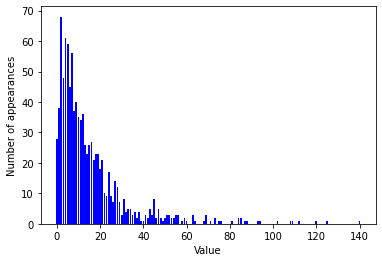

In [3]:
import numpy as np
rnd = np.random.RandomState(0) 
X_org = rnd.normal(size=(1000, 3)) 
w = rnd.normal(size=3)
X = rnd.poisson(10 * np.exp(X_org)) 
y = np.dot(X_org, w)
bins = np.bincount(X[:, 0]) 
import matplotlib.pyplot as plt
plt.bar(range(len(bins)), bins, color='b') 
plt.ylabel("Number of appearances") 
plt.xlabel("Value")

In [4]:
print("Number of feature appearances:\n{}".format(np.bincount(X[:, 0])))

Number of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


The value 2 seems to be the most common, with 68 appearances (bincount always starts at 0), and the counts for higher values fall quickly. However, there are some very high values, like 84 and 85, that are appearing twice.

Features X[:, 1] and X[:, 2] have similar properties. This kind of distribution of values (many small ones and a few very large ones) is very common in practice. However, it is something most linear models can’t handle very well. Let’s try to fit a ridge regression to this model:

In [5]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))


Test score: 0.622


As you can see from the relatively low R2 score, Ridge was not able to really capture the relationship between X and y. Applying a logarithmic transformation can help, though. Because the value 0 appears in the data (and the logarithm is not defined at 0), we can’t actually just apply log, but we have to compute log(X + 1):

In [0]:
X_train_log = np.log(X_train + 1) 
X_test_log = np.log(X_test + 1)

After the transformation, the distribution of the data is less asymmetrical and doesn’t have very large outliers anymore.

Text(0.5, 0, 'Value')

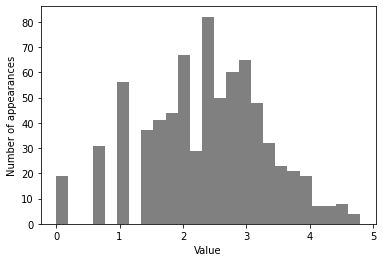

In [7]:
plt.hist(X_train_log[:, 0], bins=25, color='gray') 
plt.ylabel("Number of appearances") 
plt.xlabel("Value")

Building a ridge model on the new data provides a much better fit.

In [8]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test) 
print("Test score: {:.3f}".format(score))


Test score: 0.875
